# Tipología de Democracias en el Mundo (2025) – Análisis de Clustering



## Introducción

La democracia adopta múltiples formas y niveles de calidad.  
Este proyecto analiza **cómo se agrupan los países del mundo** según sus características democráticas, utilizando indicadores desarrollados por el prestigioso proyecto **V-Dem (Varieties of Democracy)**.

V-Dem es una iniciativa internacional coordinada por la **Universidad de Gotemburgo** (Suecia) y la **Universidad de Notre Dame** (Estados Unidos), que trabaja junto con una red global de más de **3.500 expertos** para evaluar la calidad institucional y democrática de países en todo el mundo.

Los datos de V-Dem constituyen **el estándar más completo** en estudios comparados de democracia, midiendo dimensiones como:

- libertades civiles  
- participación ciudadana  
- independencia judicial  
- libertad de prensa  
- igualdad política  
- control del poder y rendición de cuentas  

El objetivo de este proyecto es **descubrir tipologías de democracias** en el presente, combinando técnicas de **Machine Learning no supervisado** con interpretación politológica para proponer una clasificación empírica de los regímenes políticos contemporáneos.

**Dataset:** `V-Dem-CY-Core-v15.csv`  
- Versión 15 (marzo 2025)  
- Datos país–año con +1.000 indicadores de democracia, derechos y participación  
- Se utilizará el **año más reciente disponible** para una visión actual del panorama democrático global

---

## Preguntas guía
- ¿Qué tipos de democracia se observan hoy en el mundo?  
- ¿Qué indicadores politológicos definen mejor esas diferencias?  
- ¿Qué países conforman democracias **liberales**, **electorales**, **delegativas** o **autoritarismos**?

---

## Objetivos
- Seleccionar indicadores centrales sobre calidad democrática (instituciones, libertades, participación).  
- Aplicar **PCA** para reducción de dimensionalidad.  
- Entrenar **K-Means** (y/o DBSCAN) para identificar clusters.  
- Visualizar los agrupamientos en 2D y **analizar sus implicancias politológicas**.

---

## Alcance y supuestos
- Se utiliza información pública y consolidada de V-Dem.  
- Se trabaja a nivel **comparado** (todos los países con datos disponibles).  
- El análisis se limita a variables seleccionadas y al año más reciente con cobertura global.  
- El resultado **no implica juicios normativos**, sino una clasificación basada en datos.  

Si bien la medición de la democracia es un campo atravesado por debates conceptuales y disputas normativas, este proyecto no busca cuestionar ni reformular las definiciones adoptadas por V-Dem. El foco se centra en **aplicar técnicas de análisis no supervisado** para identificar patrones y agrupamientos **en función de los datos disponibles**, reconociendo que toda clasificación politológica es una representación parcial de fenómenos complejos.

---

## Reproducibilidad
- Dependencias detalladas en `requirements.txt`  
- Estructura del proyecto basada en mejores prácticas de Data Science  
- Notebook y scripts alojados en `/notebooks` y `/src`  

**Citación recomendada:**  
V-Dem Institute (2025). *V-Dem Country-Year Dataset v15*. Gothenburg: University of Gothenburg and University of Notre Dame.  
Disponible en: https://www.v-dem.net/data/the-v-dem-dataset/

## 0. Configuración inicial

En esta sección se importan las librerías necesarias y se definen configuraciones visuales globales  
que se aplicarán a lo largo del notebook.

In [1]:
# --- Importaciones principales ---
import pandas as pd
import numpy as np

# --- Visualización ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preprocesamiento ---
from sklearn.preprocessing import StandardScaler

# --- Reducción de dimensionalidad ---
from sklearn.decomposition import PCA

# --- Clustering ---
from sklearn.cluster import KMeans

# --- Evaluación del clustering ---
from sklearn.metrics import silhouette_score

In [2]:
# --- Configuración visual ---

# Estilo general de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

# Mostrar todas las columnas al inspeccionar DataFrames
pd.set_option('display.max_columns', None)

## 1. Carga e inspección inicial de los datos

En esta sección se importa el dataset y se realiza una primera exploración general.  
El objetivo es verificar la estructura, tipos de datos, valores nulos o duplicados,  
y obtener una visión preliminar del contenido antes del análisis detallado.

In [3]:
# --- Carga de datos ---
file_path = "../data/raw/V-Dem-CY-Core-v15.csv"
df = pd.read_csv(file_path, low_memory=False)

In [4]:
# --- Vista general y estructura ---
print("Dimensiones:", df.shape)
display(df.head())
print("\nInformación general del DataFrame:\n")
df.info()

Dimensiones: (27913, 1818)


country_name country_text_id  country_id  year historical_date  project  \
0       Mexico             MEX           3  1789      1789-12-31        1   
1       Mexico             MEX           3  1790      1790-12-31        1   
2       Mexico             MEX           3  1791      1791-12-31        1   
3       Mexico             MEX           3  1792      1792-12-31        1   
4       Mexico             MEX           3  1793      1793-12-31        1   

   historical                  histname  codingstart  codingend  \
0           1  Viceroyalty of New Spain         1789       2024   
1           1  Viceroyalty of New Spain         1789       2024   
2           1  Viceroyalty of New Spain         1789       2024   
3           1  Viceroyalty of New Spain         1789       2024   
4           1  Viceroyalty of New Spain         1789       2024   

   codingstart_contemp  codingend_contemp  codingstart_hist  codingend_hist  \
0               1900.0             2024.0            1789.0          1920.0   
1               1900.0             2024.0            1789.0          1920.0   
2               1900.0             2024.0            1789.0          1920.0   
3               1900.0             2024.0            1789.0          1920.0   
4               1900.0             2024.0            1789.0          1920.0   

   gapstart1  gapstart2  gapstart3  gapend1  gapend2  gapend3  gap_index  \
0        NaN        NaN        NaN      NaN      NaN      NaN          1   
1        NaN        NaN        NaN      NaN      NaN      NaN          1   
2        NaN        NaN        NaN      NaN      NaN      NaN          1   
3        NaN        NaN        NaN      NaN      NaN      NaN          1   
4        NaN        NaN        NaN      NaN      NaN      NaN          1   

   COWcode  v2x_polyarchy  v2x_polyarchy_codelow  v2x_polyarchy_codehigh  \
0     70.0          0.028                  0.016                   0.037   
1     70.0          0.028                  0.016                   0.037   
2     70.0          0.028                  0.016                   0.037   
3     70.0          0.028                  0.016                   0.037   
4     70.0          0.028                  0.016                   0.037   

   v2x_polyarchy_sd  v2x_libdem  v2x_libdem_codelow  v2x_libdem_codehigh  \
0             0.011       0.044               0.026                0.055   
1             0.011       0.044               0.026                0.055   
2             0.011       0.044               0.026                0.055   
3             0.011       0.044               0.026                0.055   
4             0.011       0.044               0.026                0.055   

   v2x_libdem_sd  v2x_partipdem  v2x_partipdem_codelow  \
0          0.014          0.006                  0.001   
1          0.014          0.006                  0.001   
2          0.014          0.006                  0.001   
3          0.014          0.006                  0.001   
4          0.014          0.006                  0.001   

   v2x_partipdem_codehigh  v2x_partipdem_sd  v2x_delibdem  \
0                    0.01             0.007           NaN   
1                    0.01             0.007           NaN   
2                    0.01             0.007           NaN   
3                    0.01             0.007           NaN   
4                    0.01             0.007           NaN   

   v2x_delibdem_codelow  v2x_delibdem_codehigh  v2x_delibdem_sd  v2x_egaldem  \
0                   NaN                    NaN              NaN          NaN   
1                   NaN                    NaN              NaN          NaN   
2                   NaN                    NaN              NaN          NaN   
3                   NaN                    NaN              NaN          NaN   
4                   NaN                    NaN              NaN          NaN   

   v2x_egaldem_codelow  v2x_egaldem_codehigh  v2x_egaldem_sd  v2x_api  \
0                  N


Información general del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27913 entries, 0 to 27912
Columns: 1818 entries, country_name to v2xca_academ_sd
dtypes: float64(1801), int64(13), object(4)
memory usage: 387.2+ MB


In [5]:
# --- Verificación de cobertura temporal ---
# years = df['year'].unique()
# print(np.sort(years))

# Nota: se observó que 2024 es el año más reciente con cobertura completa (~179 países)
# Por lo tanto, se trabajará únicamente con los datos correspondientes a 2024.

In [6]:
# Se filtra por el año más reciente disponible
df_2024 = df[df['year'] == 2024].copy()
print(df_2024.shape)
df_2024.head()

(179, 1818)


country_name country_text_id  country_id  year historical_date  project  \
235       Mexico             MEX           3  2024      2024-12-31        0   
360     Suriname             SUR           4  2024      2024-12-31        0   
596       Sweden             SWE           5  2024      2024-12-31        0   
823  Switzerland             CHE           6  2024      2024-12-31        0   
946        Ghana             GHA           7  2024      2024-12-31        0   

     historical                                  histname  codingstart  \
235           1                     United Mexican States         1789   
360           0  Republic of Suriname [independent state]         1900   
596           1                         Kingdom of Sweden         1789   
823           1                       Swiss Confederation         1798   
946           0                         Republic of Ghana         1902   

     codingend  codingstart_contemp  codingend_contemp  codingstart_hist  \
235       2024               1900.0             2024.0            1789.0   
360       2024               1900.0             2024.0               NaN   
596       2024               1900.0             2024.0            1789.0   
823       2024               1900.0             2024.0            1798.0   
946       2024               1902.0             2024.0               NaN   

     codingend_hist  gapstart1  gapstart2  gapstart3  gapend1  gapend2  \
235          1920.0        NaN        NaN        NaN      NaN      NaN   
360             NaN        NaN        NaN        NaN      NaN      NaN   
596          1920.0        NaN        NaN        NaN      NaN      NaN   
823          1920.0        NaN        NaN        NaN      NaN      NaN   
946             NaN        NaN        NaN        NaN      NaN      NaN   

     gapend3  gap_index  COWcode  v2x_polyarchy  v2x_polyarchy_codelow  \
235      NaN          1     70.0          0.505                  0.447   
360      NaN          2    115.0          0.768                  0.709   
596      NaN          3    380.0          0.881                  0.844   
823      NaN          4    225.0          0.894                  0.866   
946      NaN          5    452.0          0.669                  0.608   

     v2x_polyarchy_codehigh  v2x_polyarchy_sd  v2x_libdem  v2x_libdem_codelow  \
235                   0.567             0.060       0.251               0.208   
360                   0.824             0.059       0.637               0.581   
596                   0.921             0.040       0.845               0.808   
823                   0.940             0.039       0.847               0.804   
946                   0.730             0.062       0.567               0.506   

     v2x_libdem_codehigh  v2x_libdem_sd  v2x_partipdem  v2x_partipdem_codelow  \
235                0.288          0.042          0.345                  0.299   
360                0.704          0.062          0.497                  0.442   
596                0.893          0.044          0.630                  0.599   
823                0.891          0.045          0.794                  0.758   
946                0.619          0.058          0.320                  0.277   

     v2x_partipdem_codehigh  v2x_partipdem_sd  v2x_delibdem  \
235                   0.385             0.044         0.260   
360                   0.544             0.052         0.599   
596                   0.672             0.038         0.793   
823                   0.835             0.042         0.862   
946                   0.368             0.046         0.546   

     v2x_delibdem_codelow  v2x_delibdem_codehigh  v2x_delibdem_sd  \
235                 0.201                  0.315            0.057   
360                 0.540                  0.696            0.077   
596                 0.743                  0.852            0.056   
823                 0.825                  0.910            0.044   
946                 0.480              

In [7]:
# --- Calidad de datos ---

# Conteo de valores nulos por columna
nulos = df_2024.isnull().sum().sort_values(ascending=False)

print("Top 10 columnas con más valores nulos (%):\n")
nulos_pct = (nulos / len(df_2024)) * 100
print(nulos_pct.head(10).round(2).to_string())

# Filas duplicadas
duplicados = df_2024.duplicated().sum()
print(f"\nFilas duplicadas: {duplicados}")

Top 10 columnas con más valores nulos (%):

v2clpolcl_mean              100.0
v2peasbegeo_osp_codehigh    100.0
v2peasbegeo_nr              100.0
v2peasbegeo_mean            100.0
v2peasbegeo_ord_codehigh    100.0
v2peasbegeo_ord_codelow     100.0
v2peasbegeo_ord             100.0
v2peasbegeo_osp_sd          100.0
v2peasbegeo_osp_codelow     100.0
v2clpolcl_codelow           100.0

Filas duplicadas: 0


### ✅ Conclusiones de calidad de datos (2024)

- No se detectaron filas duplicadas ✅  
- Existen muchas columnas con valores nulos altos, lo cual es esperable en V-Dem porque  
  incluyen indicadores históricos y específicos por país/época  
- Para el análisis de clustering, se realizará una **selección dirigida** de indicadores  
  centrales sobre calidad democrática para evitar ruido e incompletitud en los dato

## 2. Selección de indicadores clave para el análisis

V-Dem incluye más de 1.800 variables, muchas con cobertura parcial por país o con foco histórico
(antes del sufragio universal o en contextos muy específicos).

Para el clustering se seleccionan los **High-Level Democracy Indices** (Codebook, Sección 2.1),
ya que son indicadores sintéticos consolidados que:

- resumen múltiples dimensiones institucionales y de derechos
- maximizan comparabilidad global en la actualidad
- reducen ruido y problemas de datos faltantes
- tienen interpretación politológica directa y ampliamente aceptada

Los cinco índices utilizados son:

| Dimensión democrática | Variable V-Dem | Descripción breve |
|---|---|---|
| Democracia electoral | `v2x_polyarchy` | Grado en que las elecciones son limpias, inclusivas y competitivas |
| Democracia liberal | `v2x_libdem` | Existencia de límites al poder ejecutivo, Estado de derecho y protección de libertades |
| Participación democrática | `v2x_partipdem` | Nivel de involucramiento de la ciudadanía en política y asociaciones |
| Democracia deliberativa | `v2x_delibdem` | Calidad del debate público y orientación hacia el bien común |
| Democracia igualitaria | `v2x_egaldem` | Igualdad política efectiva entre grupos sociales |

Estos índices están estandarizados en una escala de **0 a 1**  
(1 = mayor nivel democrático en la dimensión evaluada).

> Los **Mid-Level Indices** (Codebook, Sección 2.2) y otros indicadores
> se excluyen en esta fase para evitar complejidad innecesaria y mantener
> interpretabilidad en los resultados del clustering.

**Fuente de definiciones de variables:**  
V-Dem Institute (2025). *V-Dem Codebook v15*.  
Disponible en: https://www.v-dem.net/data/the-v-dem-dataset/

In [8]:
# --- Selección de indicadores clave para clustering ---

indicadores = [
    "country_name", "country_id",
    "v2x_polyarchy",      # Democracia electoral
    "v2x_libdem",         # Democracia liberal
    "v2x_egaldem",        # Igualdad política
    "v2x_partipdem",      # Participación ciudadana
    "v2x_delibdem"        # Instituciones deliberativas
]

# Subset del año 2024 con las variables seleccionadas
df_sel = df_2024[indicadores].copy()

# Vista rápida
print("Dimensiones del subconjunto:", df_sel.shape)
df_sel.head()

Dimensiones del subconjunto: (179, 7)


,country_name,country_id,v2x_polyarchy,v2x_libdem,v2x_egaldem,v2x_partipdem,v2x_delibdem
235,Mexico,3,0.505,0.251,0.268,0.345,0.260
360,Suriname,4,0.768,0.637,0.575,0.497,0.599
596,Sweden,5,0.881,0.845,0.795,0.630,0.793
823,Switzerland,6,0.894,0.847,0.830,0.794,0.862
946,Ghana,7,0.669,0.567,0.455,0.320,0.546


In [9]:
# --- Verificación de valores faltantes en indicadores seleccionados ---

nulos_sel = df_sel.isnull().mean().round(2) * 100
print("Porcentaje de valores nulos por variable (%):")
print(nulos_sel.to_string())

Porcentaje de valores nulos por variable (%):
country_name     0.0
country_id       0.0
v2x_polyarchy    0.0
v2x_libdem       0.0
v2x_egaldem      0.0
v2x_partipdem    0.0
v2x_delibdem     0.0


## 3. Normalización y Reducción de Dimensionalidad (PCA)

Los cinco indicadores seleccionados de V-Dem se encuentran en la misma escala (0 a 1), pero es importante
**normalizar** las variables para asegurar que todas contribuyan por igual al análisis de distancias entre países.

A continuación, se aplica **Análisis de Componentes Principales (PCA)** con el objetivo de:

- **reducir dimensionalidad** (de 5 dimensiones a 2)
- **facilitar la visualización** en un plano interpretable
- **identificar patrones globales** en las configuraciones democráticas actuales

PCA permite condensar la información central de las cinco dimensiones democráticas en componentes
que explican la **mayor variabilidad** entre los países, revelando diferencias estructurales en sus
modelos de democracia.


### 3.1 Normalización de indicadores

Aunque los índices de V-Dem se encuentran en una misma escala (0 a 1), 
pueden presentar **distintas dispersiones** según la dimensión democrática
(ej.: mayor variabilidad en democracia electoral que en igualdad política).

Para evitar que una dimensión domine el cálculo de distancias y la 
identificación de patrones, se aplica **normalización estándar** 
(media = 0, desvío estándar = 1) antes de ejecutar PCA y clustering.

In [12]:
# --- Normalización de los indicadores numéricos ---

# Seleccionamos únicamente las 5 variables numéricas para análisis
X = df_sel[[
    "v2x_polyarchy", "v2x_libdem", "v2x_egaldem",
    "v2x_partipdem", "v2x_delibdem"
]].values

# Normalización con media 0 y varianza 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertimos a DataFrame para mantener nombres de columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=[
    "polyarchy_scaled", "libdem_scaled", "egaldem_scaled",
    "partipdem_scaled", "delibdem_scaled"
])

X_scaled_df.head()


,polyarchy_scaled,libdem_scaled,egaldem_scaled,partipdem_scaled,delibdem_scaled
0,0.070973,-0.470530,-0.421953,0.174732,-0.438533
1,1.078273,0.998221,0.903506,0.954863,0.929974
2,1.511067,1.789672,1.853346,1.637477,1.713131
3,1.560858,1.797282,2.004456,2.479197,1.991676
4,0.699099,0.731867,0.385411,0.046421,0.716018


### 3.2 Aplicación de PCA

Se aplica PCA para reducir las cinco dimensiones democráticas a dos componentes principales que concentren la mayor parte de la variabilidad entre países. Esto permitirá visualizar diferencias estructurales en los modelos democráticos vigentes en 2024.

In [13]:
# --- Aplicación de PCA a los indicadores normalizados ---

k=2 # k=2 porque PC1 y PC2 concentran la mayor parte de la variabilidad
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_scaled)

# Convertimos a DataFrame para facilitar análisis y visualización
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["country_name"] = df_sel["country_name"].values
pca_df["country_id"] = df_sel["country_id"].values

pca_df.head()

,PC1,PC2,country_name,country_id
0,-0.486049,0.570347,Mexico,3
1,2.176055,0.080543,Suriname,4
2,3.803226,-0.209956,Sweden,5
3,4.395336,0.147090,Switzerland,6
4,1.155349,-0.242884,Ghana,7


In [16]:
# --- Varianza explicada por cada componente ---
var_exp = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:\n")
print(f"PC1: {var_exp[0]:.2%}")
print(f"PC2: {var_exp[1]:.2%}")
print(f"Total explicada: {var_exp.sum():.2%}")

Varianza explicada por cada componente:

PC1: 96.96%
PC2: 1.35%
Total explicada: 98.31%


Contribución de los indicadores a los componentes PCA:


,PC1,PC2
v2x_polyarchy,0.448,0.376
v2x_libdem,0.451,-0.066
v2x_egaldem,0.445,-0.563
v2x_partipdem,0.445,0.628
v2x_delibdem,0.446,-0.377


Varianza explicada por cada componente:



<Figure size 800x400 with 0 Axes>

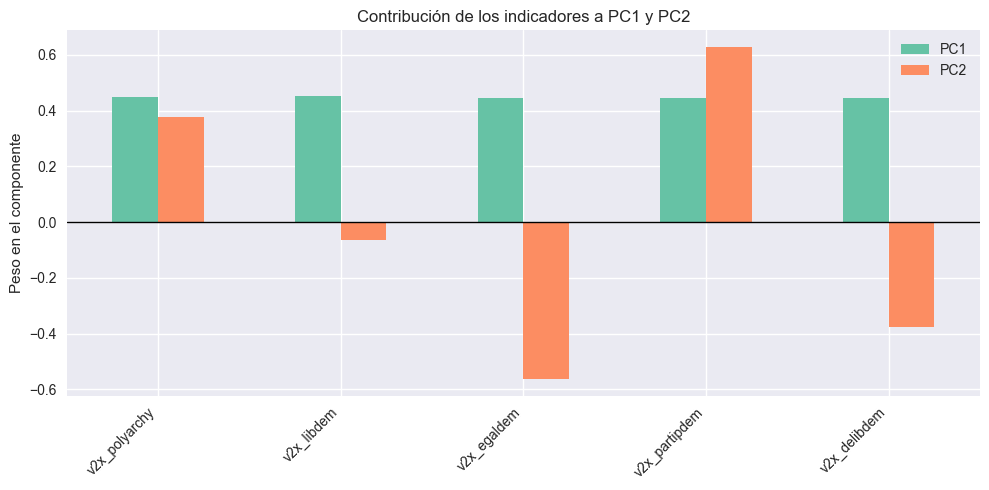

In [ ]:
# --- Importancia de cada indicador en los componentes PCA ---

indicadores_pca = [
    "v2x_polyarchy",
    "v2x_libdem",
    "v2x_egaldem",
    "v2x_partipdem",
    "v2x_delibdem"
]


loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=indicadores_pca
)

print("Contribución de los indicadores a los componentes PCA:")
display(loadings.round(3))


# Visualización en gráfico de barras
plt.figure(figsize=(8, 4))
loadings.plot(kind='bar', figsize=(10, 5))
plt.title("Contribución de los indicadores a PC1 y PC2")
plt.axhline(0, color='black', linewidth=1)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Peso en el componente")
plt.tight_layout()
plt.show()

### 3.2.2 Interpretación de loadings

- **PC1** carga fuertemente (y de forma positiva) en los 5 indicadores →  
  es un **índice global de calidad democrática**
- **PC2** diferencia modelos de democracia según:
  - participación → peso positivo fuerte
  - igualdad política y deliberación → pesos negativos

📌 **PC1** separa democracias ↔ autoritarismos  
📌 **PC2** distingue **modelos democráticos internos**

### 3.2.3 Conclusiones PCA (2024)

- PC1 explica **casi el 97%** de la varianza → la democracia es una **dimensión dominante** a nivel global
- PC2 introduce **variaciones más sutiles** dentro del universo democrático
- La estructura PC1–PC2 es **conceptualmente coherente con la teoría política comparada**

### 3.3 Visualización inicial del espacio PCA

Se grafica la posición de cada país en el nuevo espacio de dos dimensiones definido por PCA, lo que permite observar cómo se distribuyen las configuraciones democráticas en 2024 antes de aplicar algoritmos de agrupamiento.

Esta visualización facilita identificar patrones políticos globales y posibles grupos de países con características democráticas similares.

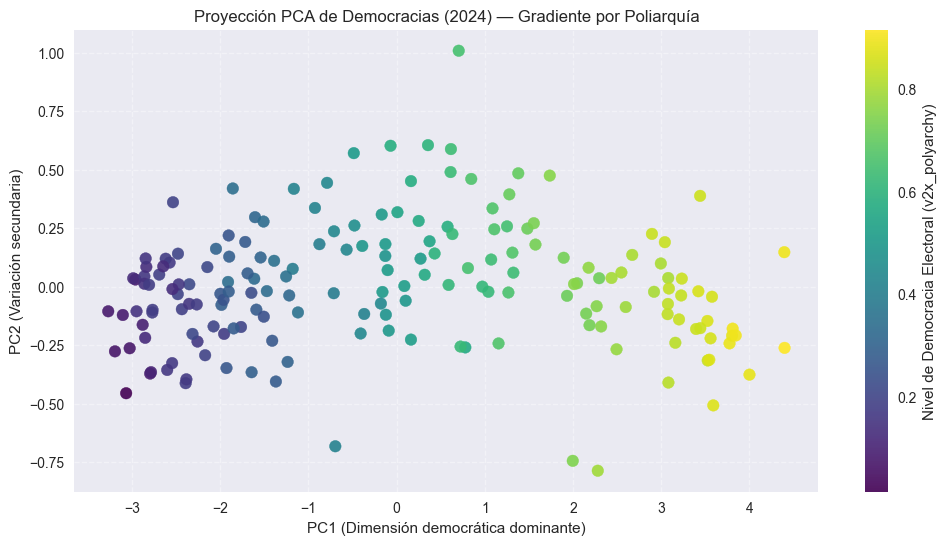

In [ ]:
# --- Visualización PCA con gradiente de democracia electoral ---

plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=df_sel['v2x_polyarchy'],   # escala de color según puntuación democrática
    cmap='viridis',
    s=70,
    alpha=0.9
)

plt.title("Proyección PCA de Democracias (2024) — Gradiente por Poliarquía")
plt.xlabel("PC1 (Dimensión democrática dominante)")
plt.ylabel("PC2 (Variación secundaria)")

# Agregar barra de color interpretativa
cbar = plt.colorbar(scatter)
cbar.set_label("Nivel de Democracia Electoral (v2x_polyarchy)")

plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

### 3.3.1 Interpretación inicial del espacio PCA (sin clustering)

El plano PCA muestra una **estructura política global reconocible**:

- **PC1** explica casi toda la variación y **ordena el mundo político** en un eje
  que separa **autocracias** ↔ **democracias plenas**
- **PC2** introduce cambios más sutiles, vinculados a matices en participación y
  calidad institucional dentro del mundo democrático

Se utiliza el índice **`v2x_polyarchy`** como escala de color, lo que permite observar
que los países con mayor democracia electoral **se concentran en los valores altos de PC1**
(marcados en colores más cálidos), mientras que los regímenes con derechos políticos
restringidos se ubican en el extremo opuesto del eje.

📌 En síntesis:  
El PCA **ya revela una tipología democrática implícita**, incluso sin aplicar clustering.

## 4. Agrupamiento de países (Clustering)

Una vez reducido el espacio a dos dimensiones relevantes mediante PCA, se aplican técnicas de **aprendizaje no supervisado** para identificar tipologías de regímenes políticos en 2024.

Se utilizará **K-Means**, un algoritmo que busca particionar los datos en grupos internamente similares y externamente distintos.

Para determinar el número óptimo de clusters (**k**), se evaluarán dos criterios complementarios:

- **El método del codo (Elbow Method)**
- **El Silhouette Score**